In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [2]:
class QCDebug(QuantumCircuit):
    
    def __init__(self, *args, **kwargs):
        self.has_breakpoints = False
        # no need to do anything if there was no breakpoints
        super(QCDebug, self).__init__(*args, **kwargs)
            
    def bp(self):
        # replicate the circuit
        self.has_breakpoints = True
        nqubits = self.num_qubits
        
        # create a register with ancilla qubits
        debug_register = QuantumRegister(nqubits, "ancilla")
        self.add_register(debug_register)
        for q in range(nqubits):
            qpe_reigster = QuantumRegister(3, "qpe")
            self.h(debug_register[q])
            

        self.draw('mpl')
    
    # TODO: if we add a new ancilla qubit we need to ensure
    # that it is not accessible from the POV of the user2

In [190]:
from math import pi

qc = QCDebug(1)
qc.x(0)
qc.z(0)
#6qc.rz(pi/2, 0)
#qc.h()

In [191]:
qc.bp()
qc.draw()

┌───┐┌───┐        
      q: ┤ X ├┤ Z ├─■──────
         ├───┤└───┘ │ ┌───┐
ancilla: ┤ H ├──────■─┤ H ├
         └───┘        └───┘

In [192]:
qc.measure_all()

In [193]:
from qiskit import Aer, execute

backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend)
result = job.result()

In [194]:
result.get_counts()

{'11': 1024}

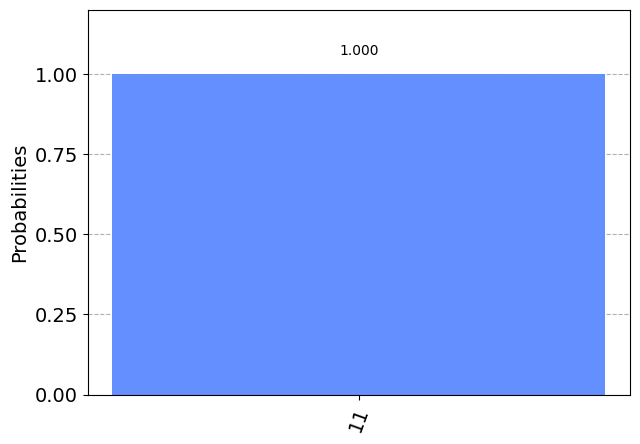

In [195]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())